In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
labels = ["Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others", "Toxic"]

batch_files = ['usanews.csv', 'foxnews0.csv', 'foxnews1.csv', 'foxnews2.csv', 'foxnews3.csv', 
                'nogla0.csv','pew0.csv', 'rae0_0.csv', 
                 'rae0_1.csv', 'terror0_0.csv', 'terror0_1.csv']

vid_files = ["foxnews_FULL.csv", "rae_FULL.csv",  "terror_FULL.csv",
             "usanews.csv" , "pew0.csv", "nogla0.csv"]
genre_files = ["gaming_channels_GENRE.csv", "news_channel_GENRE.csv" ]

files = []
#files.extend(batch_files)
files.extend(vid_files)
files.extend(genre_files)
files = np.unique(np.array(files))

print(files)


['foxnews_FULL.csv' 'gaming_channels_GENRE.csv' 'news_channel_GENRE.csv'
 'nogla0.csv' 'pew0.csv' 'rae_FULL.csv' 'terror_FULL.csv' 'usanews.csv']


In [4]:
src_folder = "../Annotations/CSVs/"
dest_folder = "tfidf_scores_POS_per_video/"


In [5]:
def corr_matrix(df, method):
    f, ax = plt.subplots(figsize=(9, 6))
    f.suptitle('Correlation matrix for categories')
    sns.heatmap(df.corr(method= method), annot=True, linewidths=.5, ax=ax)

# Label Distribution

In [6]:
labels = ["Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others", "Toxic"]

In [7]:
src_folder = "../Annotations/CSVs/"
files =  ["rae_FULL.csv",  "terror_FULL.csv", "pew0.csv", "nogla0.csv",
         "usanews.csv" , "foxnews_FULL.csv", "drdisrespect_FULL.csv"]
dfs = []
for file in files:
    df = pd.read_csv(src_folder + file)
    df_distribution = df[labels].sum()\
                            .to_frame()\
                            .rename(columns={0: file})
                            
    dfs.append(df_distribution)

# fig, axes = plt.subplots(3, 2, figsize=(16,8), squeeze=False)

# for i in range(len(dfs)):
#     display(df)

# plt.show()

x = pd.concat(dfs, axis = 1)
# fig, axes = plt.subplots(1, 1, figsize=(16,8), squeeze=False)
# fig.suptitle('Label Distribution of Genres')
# x.plot(kind='barh', ax = axes[0,0])

x.T

,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
rae_FULL.csv,1.0,0.0,1.0,2.0,0.0,0.0
terror_FULL.csv,27.0,6.0,3.0,7.0,5.0,20.0
pew0.csv,7.0,0.0,1.0,14.0,0.0,6.0
nogla0.csv,16.0,119.0,7.0,20.0,0.0,21.0
usanews.csv,397.0,760.0,24.0,393.0,65.0,401.0
foxnews_FULL.csv,169.0,42.0,2.0,90.0,10.0,35.0
drdisrespect_FULL.csv,19.0,1.0,1.0,0.0,0.0,4.0


In [8]:
src_folder = "../Annotations/CSVs/"
files =  genre_files
genre = ["gamming channels", "news channels"]
dfs = []
i = 0
for file in files:
    df = pd.read_csv(src_folder + file)
    df_distribution = df[labels].sum()\
                            .to_frame()\
                            .rename(columns={0: "count"})
    i+=1
    dfs.append(df_distribution)

# fig, axes = plt.subplots(1, 2, figsize=(16,4), squeeze=False)
fig.suptitle('Label Distribution of Genres')

for i in range(len(dfs)):
    #dfs[i].plot(kind='barh', ax=axes[ i //  3 ,  i % 3 ], alpha=0.5).set(title = genre[i])
    dfs[i].plot.pie(y='count',title='Label distribution ' + genre[i], figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
# plt.show()

x = pd.concat(dfs, axis = 1)
# fig, axes = plt.subplots(1, 1, figsize=(16,8), squeeze=False)
# fig.suptitle('Label Distribution of Genres')
# x.plot(kind='barh', ax = axes[0,0])

x.T

C:\Users\Phoebe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


NameError: name 'fig' is not defined

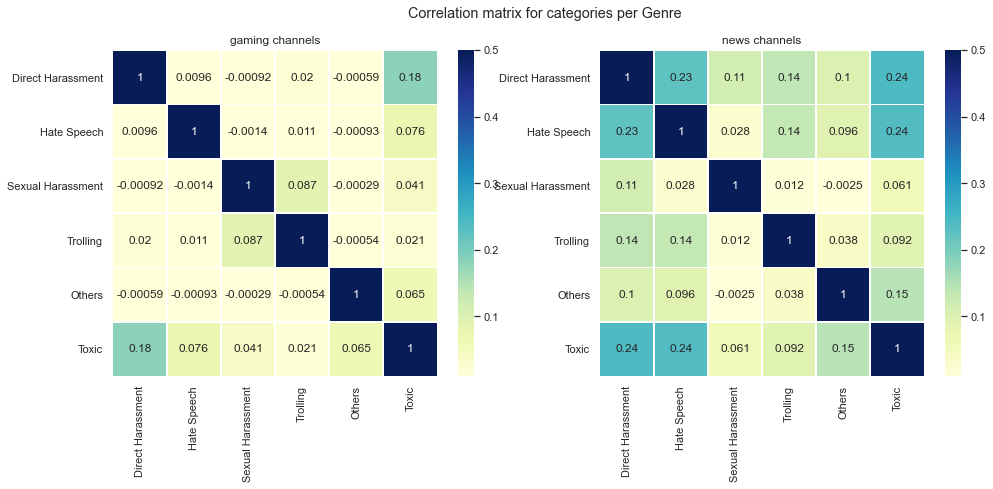

In [181]:
src_folder = "../Annotations/CSVs/"
files =  genre_files
genre = ["gaming channels", "news channels"]
fig, axes = plt.subplots(1,2, figsize=(16, 6), squeeze=False)
fig.suptitle('Correlation matrix for categories per Genre')
# sns.heatmap(df[labels].corr(), annot=True, linewidths=.5, ax=ax)
sns.set_theme()
dfs = []
for file in files:
    df = pd.read_csv(src_folder + file)
    dfs.append(df)
for i in range(len(dfs)):
    df = dfs[i]
    sns.heatmap(df[labels].corr(method = "pearson"), annot=True, linewidths=.5, 
                ax = axes[ i // 2 ,  i % 2], vmax = 0.5,  vmin = 0.01, cmap="YlGnBu",
                ).set(title = genre[i])

In [ ]:
t = df[(df['Toxic'] == 1) & (df['Direct Harassment'] == 0)].shape[0]
d = df[(df['Toxic'] == 0) & (df['Direct Harassment'] == 1)].shape[0]
t_d = df[(df['Toxic'] == 1) & (df['Direct Harassment'] == 1)].shape[0]

In [267]:
labels_ = ["Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others"]
src_folder = "../Annotations/CSVs/"
toxic = "Toxic"
files = genre_files
for file in files:
    print("----------------------------------")
    df = pd.read_csv(src_folder + file)
    print(f"{file}")
    print("----------------------------------")
    for label in labels_:
        t = df[(df[toxic] == 1) ].shape[0]
        d = df[(df[label] == 1) ].shape[0]
        t_d = df[(df[toxic] == 1) & (df[label] == 1)].shape[0]
        print(f"tagged_toxic: {t_d} / {t}\t\t {d}\t{label}")
        
    

----------------------------------
gaming_channels_GENRE.csv
----------------------------------
tagged_toxic: 9 / 47		 51	Direct Harassment
tagged_toxic: 6 / 47		 125	Hate Speech
tagged_toxic: 1 / 47		 12	Sexual Harassment
tagged_toxic: 1 / 47		 43	Trolling
tagged_toxic: 1 / 47		 5	Others
----------------------------------
news_channel_GENRE.csv
----------------------------------
tagged_toxic: 127 / 434		 533	Direct Harassment
tagged_toxic: 153 / 434		 781	Hate Speech
tagged_toxic: 7 / 434		 26	Sexual Harassment
tagged_toxic: 52 / 434		 470	Trolling
tagged_toxic: 28 / 434		 75	Others
